In [1]:
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from io import StringIO
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [2]:
train_samples = []
raw_data = []
train_labels = []
one_line_train_labels = [0]*70
for i in range(1, 106):
    train_labels.append(list(map(int, one_line_train_labels)))
    train_samples.append(list(map(int, one_line_train_labels)))
for i in train_labels:
    print(i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
filepath = 'winning_numbers_PowerBall_2019.txt' 
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        if 'Powerball' in line:
            new_line = line.replace('Powerball:', '')
            new_line = new_line.replace('PowerPlay:', '')
            print("Line {}: {}".format(cnt, new_line.strip()))
            raw_data.append(list(map(int, new_line.strip().split())))
            line = fp.readline()
            cnt += 1
        elif '/' in line:
            print("Line {}: {}".format(cnt, 'skipped'))
            line = fp.readline()
            cnt += 1
        else:
            #raw_data.append(line)
            print("Line {}: {}".format(cnt, line.strip(), "Nothing"))
            line = fp.readline()
            cnt += 1
            
    for x in raw_data:
        print(x)

Line 1: skipped
Line 2: 8   12   42   46   56   12     2
Line 3: skipped
Line 4: 3   7   15   27   69   19     2
Line 5: skipped
Line 6: 6   19   37   49   59   22     3
Line 7: skipped
Line 8: 7   36   48   57   58   24     2
Line 9: skipped
Line 10: 14   29   31   56   61   1     2
Line 11: skipped
Line 12: 5   8   41   65   66   20     3
Line 13: skipped
Line 14: 23   25   47   48   50   24     3
Line 15: skipped
Line 16: 8   12   20   21   32   10     4
Line 17: skipped
Line 18: 2   12   16   29   54   6     2
Line 19: skipped
Line 20: 10   17   18   43   65   13     5
Line 21: skipped
Line 22: 5   13   28   38   63   21     5
Line 23: skipped
Line 24: 1   2   3   7   39   25     3
Line 25: skipped
Line 26: 2   8   14   24   69   26     2
Line 27: skipped
Line 28: 29   30   41   48   64   1     4
Line 29: skipped
Line 30: 27   49   50   51   52   2     2
Line 31: skipped
Line 32: 4   6   14   20   32   13     2
Line 33: skipped
Line 34: 21   31   42   49   59   23     5
Line 35: sk

In [4]:
counter_raw_data = 0
counter_train_labels = 0
for x in raw_data:
    print(x)
    for j in range(0, 6):
        print('counter_train_labels:', counter_train_labels)
        print(x[j])
        if counter_raw_data > 0:
            train_labels[counter_train_labels][x[j]-1] = (1)
            print('train_labels', train_labels[counter_train_labels])
            
        train_samples[counter_train_labels][x[j]-1] = (1)
        print('Added to train_samples: ',  train_samples[counter_train_labels])
        
    print('processed 1 set of numbers -------------------------------------- \n')
    counter_train_labels += 1
    counter_raw_data += 1
           

[8, 12, 42, 46, 56, 12, 2]
counter_train_labels: 0
8
Added to train_samples:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
counter_train_labels: 0
12
Added to train_samples:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
counter_train_labels: 0
42
Added to train_samples:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
counter_train_labels: 0
46
Added to train_samples:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [5]:
print("train_labels lenght: ", len(train_labels))
train_labels.pop(0)
for z in train_labels:
    print(z)

train_labels lenght:  105
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [6]:
print("train_samples lenght: ", len(train_samples))
train_samples.pop()
print("train_samples lenght after pop: ", len(train_samples))
for i in train_samples:
    print(i)

train_samples lenght:  105
train_samples lenght after pop:  104
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1

In [7]:
val_data=[]
x_val=[]
y_val=[]
filepath = 'validation_data_PowerBall.txt' 
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        if 'Powerball' in line:
            new_line = line.replace('Powerball:', '')
            new_line = new_line.replace('PowerPlay:', '')
            print("Line {}: {}".format(cnt, new_line.strip()))
            val_data.append(list(map(int, new_line.strip().split())))
            line = fp.readline()
            cnt += 1
        elif '/' in line:
            print("Line {}: {}".format(cnt, 'skipped'))
            line = fp.readline()
            cnt += 1
        else:
            #raw_data.append(line)
            print("Line {}: {}".format(cnt, line.strip(), "Nothing"))
            line = fp.readline()
            cnt += 1
    print("Validation data :")        
    for x in val_data:
        print(x)

one_line_train_labels = [0]*70
for i in range(0, 3):
    x_val.append(list(map(int, one_line_train_labels)))
    y_val.append(list(map(int, one_line_train_labels)))
print("x_val[]:")
for i in x_val:
    print(i)
        
        
counter_val_data = 0
counter_x_val = 0
for x in val_data:
    print(x)
    for j in range(0, 6):
        print('counter_x_val:', counter_x_val)
        print(x[j])
        y_val[counter_x_val][x[j]-1] = (1)
        print('y_val', y_val[counter_x_val])
        x_val[counter_x_val][x[j]-1] = (1)
        print('Added to x_val: ',  x_val[counter_x_val])
        
    print('processed 1 set of numbers -------------------------------------- \n')
    counter_x_val += 1
    counter_val_data += 1

x_val.pop()
y_val.pop(0)
print("x_val[]:")
for i in x_val:
    print(i)
print("--------------------------------------------------------------------------------------")
print("y_val[]:")
for i in y_val:
    print(i)
print("--------------------------------------------------------------------------------------")

Line 1: skipped
Line 2: 4   8   23   46   65   1     2
Line 3: skipped
Line 4: 7   9   26   44   68   3     3
Line 5: skipped
Line 6: 13   23   32   35   68   21     3
Validation data :
[4, 8, 23, 46, 65, 1, 2]
[7, 9, 26, 44, 68, 3, 3]
[13, 23, 32, 35, 68, 21, 3]
x_val[]:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 8, 23, 46, 65, 1, 2]
counter_x_val: 0
4
y_val [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
x_val =np.array(x_val)
y_val =np.array(y_val)

In [9]:
scaler = MinMaxScaler(feature_range = (0.0002,0.9998))
#scaled_train_samples = scaler.fit_transform((train_samples))
scaled_train_labels = scaler.fit_transform((train_labels))
scaled_train_samples = scaler.fit_transform((train_samples))
scaled_x_val = scaler.fit_transform((x_val))
scaled_y_val = scaler.fit_transform((y_val))
print('scaled_x_val: ', scaled_x_val)

scaled_x_val:  [[9.998e-01 2.000e-04 2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04
  9.998e-01 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04]
 [2.000e-04 2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04 9.998e-01
  2.000e-04 9.998e-01 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
  2.000e-04 2.000e-04 2.000e-04 2.000e-04 9.998e

In [10]:
model = Sequential([
    Dense(280, input_shape=(70,), activation='softmax'),
    Dense(560, activation='softmax'),
    Dense(70, activation='softmax')
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 280)               19880     
_________________________________________________________________
dense_2 (Dense)              (None, 560)               157360    
_________________________________________________________________
dense_3 (Dense)              (None, 70)                39270     
Total params: 216,510
Trainable params: 216,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#model.fit(scaled_train_samples, scaled_train_labels,  epochs=1000, shuffle=False, verbose=1)

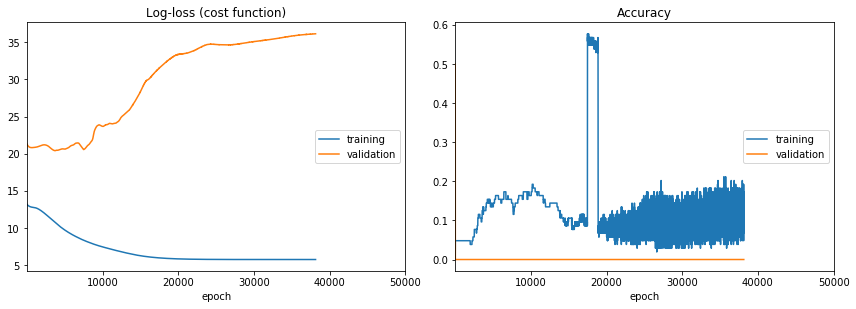

Log-loss (cost function):
training   (min:    5.726, max:   13.167, cur:    5.726)
validation (min:   20.399, max:   36.153, cur:   36.153)

Accuracy:
training   (min:    0.000, max:    0.577, cur:    0.087)
validation (min:    0.000, max:    0.500, cur:    0.000)
Epoch 38130/50000
104/104 [==============================] - 0s 163us/step - loss: 5.7264 - acc: 0.1250 - val_loss: 36.1528 - val_acc: 0.0000e+00


In [ ]:
%matplotlib inline
from livelossplot.keras import PlotLossesCallback

model.fit(scaled_train_samples, scaled_train_labels,
          epochs=50000,
          validation_data=(scaled_x_val, scaled_y_val),
          callbacks=[PlotLossesCallback(),keras.callbacks.ModelCheckpoint('PowerBall/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=100)],
          shuffle=False)

In [ ]:
#model.save('predictions_ready_model_powerball_lr=0.006_7500_Epoch_7.17.19.h5')